In [274]:
import os
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [275]:
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 'Capillry_Flow_conditions_all_parameters.ipynb',
 'Capillry_Flow_conditions_reduced_params.ipynb',
 'Flow Regime plot.ipynb',
 'flow_all_params.csv',
 'flow_cases_regime_plot.csv',
 'flow_cases_regime_plot.xlsx',
 'flow_reduced_params.csv',
 'flow_reduced_params.xlsx',
 'flow_reduced_params_for_regime_plot.csv',
 'flow_reduced_params_for_regime_plot.xlsx',
 'ML_model_allparamaters1.xlsx',
 'ML_model_allparamaters2.csv',
 'ML_model_allparamaters2.xlsx',
 'no_flow_cases_regime.csv',
 'no_flow_cases_regime.xlsx',
 'Regime_plot.png',
 'xgboost-1.6.1-pp38-pypy38_pp73-win_amd64.whl']

In [276]:
raw_df = pd.read_csv('flow_all_params.csv',low_memory=False)[0:324]

In [277]:
raw_df

,h1,w1,h2,w2,cos_theta,sigma,flow_condition
0,100.0,400.0,200.0,800.0,0.388642,51.3,No
1,200.0,400.0,300.0,800.0,0.388642,51.3,No
2,300.0,400.0,400.0,800.0,0.388642,51.3,No
3,400.0,400.0,500.0,800.0,0.388642,51.3,No
4,600.0,400.0,700.0,800.0,0.388642,51.3,No
...,...,...,...,...,...,...,...
319,200.0,400.0,300.0,1600.0,0.799029,28.0,Yes
320,300.0,400.0,400.0,1600.0,0.799029,28.0,Yes
321,400.0,400.0,500.0,1600.0,0.799029,28.0,Yes
322,600.0,400.0,700.0,1600.0,0.799029,28.0,Yes


In [278]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   h1              324 non-null    float64
 1   w1              324 non-null    float64
 2   h2              324 non-null    float64
 3   w2              324 non-null    float64
 4   cos_theta       324 non-null    float64
 5   sigma           324 non-null    float64
 6   flow_condition  324 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.8+ KB


In [279]:
raw_df.describe()

,h1,w1,h2,w2,cos_theta,sigma
count,324.000000,324.0,324.000000,324.000000,324.000000,324.000000
mean,400.000000,400.0,544.444444,1244.444444,0.587048,36.500000
std,238.415824,0.0,243.554687,263.343588,0.145427,8.053582
min,100.000000,400.0,200.000000,800.000000,0.388642,28.000000
25%,200.000000,400.0,300.000000,1000.000000,0.446822,30.000000
50%,350.000000,400.0,500.000000,1200.000000,0.580611,33.850000
75%,600.000000,400.0,700.000000,1400.000000,0.726575,42.000000
max,800.000000,400.0,1000.000000,1600.000000,0.799029,51.300000


In [280]:
pd.value_counts(raw_df['flow_condition'])

No     191
Yes    133
Name: flow_condition, dtype: int64

In [281]:
raw_df = pd.DataFrame(raw_df).replace({'Yes': 1, 'No' : 0}).copy()

In [282]:
raw_df

,h1,w1,h2,w2,cos_theta,sigma,flow_condition
0,100.0,400.0,200.0,800.0,0.388642,51.3,0
1,200.0,400.0,300.0,800.0,0.388642,51.3,0
2,300.0,400.0,400.0,800.0,0.388642,51.3,0
3,400.0,400.0,500.0,800.0,0.388642,51.3,0
4,600.0,400.0,700.0,800.0,0.388642,51.3,0
...,...,...,...,...,...,...,...
319,200.0,400.0,300.0,1600.0,0.799029,28.0,1
320,300.0,400.0,400.0,1600.0,0.799029,28.0,1
321,400.0,400.0,500.0,1600.0,0.799029,28.0,1
322,600.0,400.0,700.0,1600.0,0.799029,28.0,1


## Training, Validation and Test Sets

    Let's divide the data we have into three datasets for training, validation and testing. We will split the data into 60%, 20%, 20%

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 45)
train_df, val_df = train_test_split(raw_df, test_size = 0.25, random_state = 45)

In [285]:
pd.value_counts(train_df['flow_condition'])

0    141
1    102
Name: flow_condition, dtype: int64

In [286]:
pd.value_counts(val_df['flow_condition'])

0    50
1    31
Name: flow_condition, dtype: int64

In [287]:
pd.value_counts(test_df['flow_condition'])

0    37
1    28
Name: flow_condition, dtype: int64

In [288]:
train_df

,h1,w1,h2,w2,cos_theta,sigma,flow_condition
230,300.0,400.0,400.0,1400.0,0.541958,36.1,0
148,600.0,400.0,700.0,1200.0,0.388642,51.3,0
224,300.0,400.0,400.0,1400.0,0.446822,42.0,0
197,800.0,400.0,1000.0,1400.0,0.541958,36.1,0
238,600.0,400.0,700.0,1400.0,0.619265,31.6,1
...,...,...,...,...,...,...,...
163,200.0,400.0,300.0,1200.0,0.619265,31.6,1
213,400.0,400.0,600.0,1400.0,0.799029,28.0,1
95,800.0,400.0,1000.0,1200.0,0.619265,31.6,0
32,300.0,400.0,400.0,800.0,0.799029,28.0,1


In [289]:
val_df

,h1,w1,h2,w2,cos_theta,sigma,flow_condition
138,100.0,400.0,200.0,1000.0,0.799029,28.0,1
176,300.0,400.0,400.0,1200.0,0.799029,28.0,1
20,300.0,400.0,400.0,800.0,0.619265,31.6,1
33,400.0,400.0,500.0,800.0,0.799029,28.0,1
118,600.0,400.0,700.0,1000.0,0.446822,42.0,0
...,...,...,...,...,...,...,...
115,200.0,400.0,300.0,1000.0,0.446822,42.0,0
218,300.0,400.0,400.0,1400.0,0.388642,51.3,0
146,300.0,400.0,400.0,1200.0,0.388642,51.3,0
145,200.0,400.0,300.0,1200.0,0.388642,51.3,0


In [290]:
test_df

,h1,w1,h2,w2,cos_theta,sigma,flow_condition
138,100.0,400.0,200.0,1000.0,0.799029,28.0,1
176,300.0,400.0,400.0,1200.0,0.799029,28.0,1
20,300.0,400.0,400.0,800.0,0.619265,31.6,1
33,400.0,400.0,500.0,800.0,0.799029,28.0,1
118,600.0,400.0,700.0,1000.0,0.446822,42.0,0
...,...,...,...,...,...,...,...
223,200.0,400.0,300.0,1400.0,0.446822,42.0,0
290,300.0,400.0,400.0,1600.0,0.388642,51.3,0
13,200.0,400.0,300.0,800.0,0.541958,36.1,1
3,400.0,400.0,500.0,800.0,0.388642,51.3,0


In [291]:
input_cols = list(train_df.columns)[:-1]
target_cols = 'flow_condition'

In [292]:
target_cols

'flow_condition'

In [293]:
input_cols

['h1', 'w1', 'h2', 'w2', 'cos_theta', 'sigma']

In [294]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [295]:
val_inputs = val_df[input_cols].copy()
val_targets =  val_df[target_cols].copy()

In [296]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [297]:
train_inputs

,h1,w1,h2,w2,cos_theta,sigma
230,300.0,400.0,400.0,1400.0,0.541958,36.1
148,600.0,400.0,700.0,1200.0,0.388642,51.3
224,300.0,400.0,400.0,1400.0,0.446822,42.0
197,800.0,400.0,1000.0,1400.0,0.541958,36.1
238,600.0,400.0,700.0,1400.0,0.619265,31.6
...,...,...,...,...,...,...
163,200.0,400.0,300.0,1200.0,0.619265,31.6
213,400.0,400.0,600.0,1400.0,0.799029,28.0
95,800.0,400.0,1000.0,1200.0,0.619265,31.6
32,300.0,400.0,400.0,800.0,0.799029,28.0


In [298]:
train_targets.dtype

dtype('int64')

In [299]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
numeric_cols

['h1', 'w1', 'h2', 'w2', 'cos_theta', 'sigma']

### Scaling Numeric Features

In [300]:
from sklearn.preprocessing import MinMaxScaler

In [301]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [302]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [303]:
train_inputs

,h1,w1,h2,w2,cos_theta,sigma
230,0.285714,0.0,0.250,0.75,0.373588,0.347639
148,0.714286,0.0,0.625,0.50,0.000000,1.000000
224,0.285714,0.0,0.250,0.75,0.141771,0.600858
197,1.000000,0.0,1.000,0.75,0.373588,0.347639
238,0.714286,0.0,0.625,0.75,0.561965,0.154506
...,...,...,...,...,...,...
163,0.142857,0.0,0.125,0.50,0.561965,0.154506
213,0.428571,0.0,0.500,0.75,1.000000,0.000000
95,1.000000,0.0,1.000,0.50,0.561965,0.154506
32,0.285714,0.0,0.250,0.00,1.000000,0.000000


## Training a logistic Regression Model

In [304]:
from sklearn.linear_model import LogisticRegression

In [305]:
lrmodel = LogisticRegression(solver = 'liblinear')

In [306]:
lrmodel.fit(train_inputs,train_targets)

LogisticRegression(solver='liblinear')

In [307]:
print(lrmodel.coef_)

[[-0.18969265  0.         -1.38344027 -1.38496444  4.33939802 -3.1400219 ]]


In [308]:
print(lrmodel.intercept_)

[-0.44943599]


In [309]:
train_preds = lrmodel.predict(train_inputs)
train_preds

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0], dtype=int64)

In [310]:
train_targets

230    0
148    0
224    0
197    0
238    1
      ..
163    1
213    1
95     0
32     1
131    1
Name: flow_condition, Length: 243, dtype: int64

In [311]:
train_probs = lrmodel.predict_proba(train_inputs)
train_probs

array([[0.79554258, 0.20445742],
       [0.99494387, 0.00505613],
       [0.95929027, 0.04070973],
       [0.92633714, 0.07366286],
       [0.6306173 , 0.3693827 ],
       [0.96553229, 0.03446771],
       [0.15733877, 0.84266123],
       [0.14218287, 0.85781713],
       [0.53365105, 0.46634895],
       [0.8183007 , 0.1816993 ],
       [0.13574453, 0.86425547],
       [0.20884152, 0.79115848],
       [0.47027563, 0.52972437],
       [0.06572595, 0.93427405],
       [0.89292788, 0.10707212],
       [0.96232158, 0.03767842],
       [0.84261389, 0.15738611],
       [0.87044902, 0.12955098],
       [0.81062787, 0.18937213],
       [0.54701689, 0.45298311],
       [0.95318094, 0.04681906],
       [0.99856844, 0.00143156],
       [0.39856158, 0.60143842],
       [0.38573425, 0.61426575],
       [0.3766346 , 0.6233654 ],
       [0.9334028 , 0.0665972 ],
       [0.5697963 , 0.4302037 ],
       [0.0752948 , 0.9247052 ],
       [0.93825971, 0.06174029],
       [0.98703947, 0.01296053],
       [0.

In [312]:
from sklearn.metrics import accuracy_score

In [313]:
accuracy_score(train_targets, train_preds)

0.9218106995884774

In [314]:
val_preds = lrmodel.predict(val_inputs)
val_preds

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [315]:
accuracy_score(val_targets,val_preds)

0.9135802469135802

In [316]:
test_preds = lrmodel.predict(test_inputs)
test_preds

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [317]:
accuracy_score(test_targets,test_preds)

0.9230769230769231

In [318]:
from sklearn.metrics import confusion_matrix

In [319]:
cf = confusion_matrix(train_targets,train_preds, normalize = 'true')

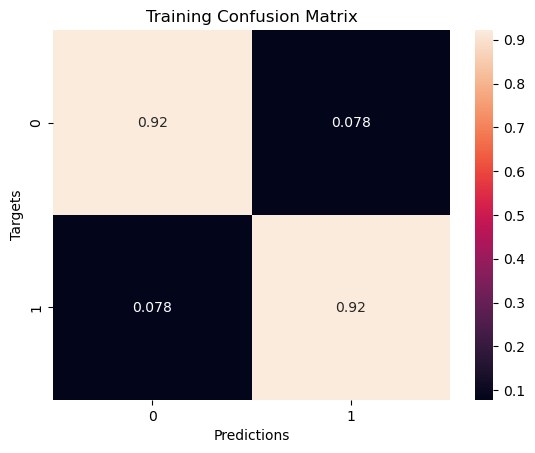

In [320]:
sns.heatmap(cf,annot = True)
plt.xlabel('Predictions')
plt.ylabel('Targets')
plt.title('Training Confusion Matrix');

In [321]:
def predict_and_plot(inputs,targets, name = ''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets,preds)
    
    print("Accuracy Score: ", accuracy*100)
    
    cf = confusion_matrix(targets,preds, normalize = 'true' )
    plt.figure
    sns.heatmap(cf, annot = True)
    plt.xlabel('Predictions')
    plt.ylabel('Targets')
    plt.title('{} Confusion Matrix' .format(name))
    
    return preds

Accuracy Score:  92.18106995884774


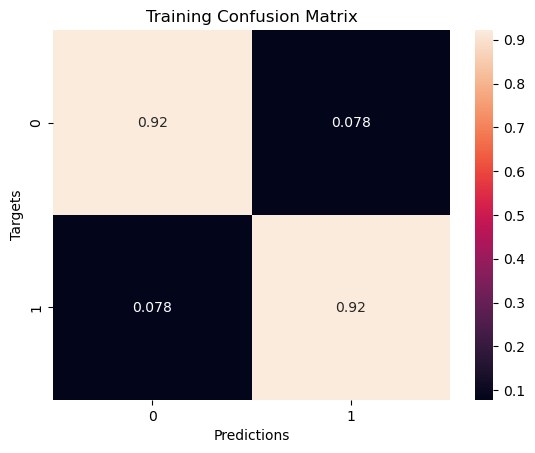

In [322]:
train_preds = predict_and_plot(train_inputs, train_targets, name = 'Training')

Accuracy Score:  91.35802469135803


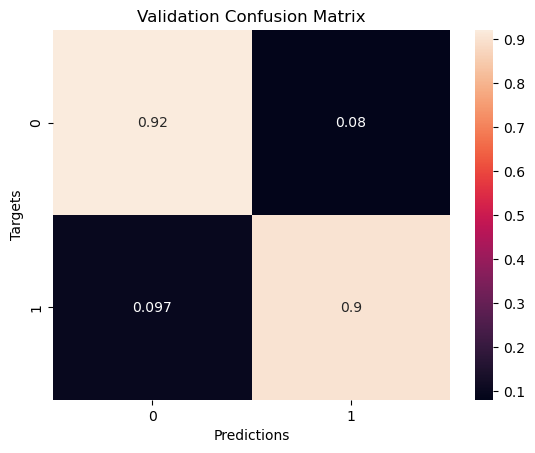

In [323]:
val_preds = predict_and_plot(val_inputs,val_targets, name = 'Validation')

Accuracy Score:  92.3076923076923


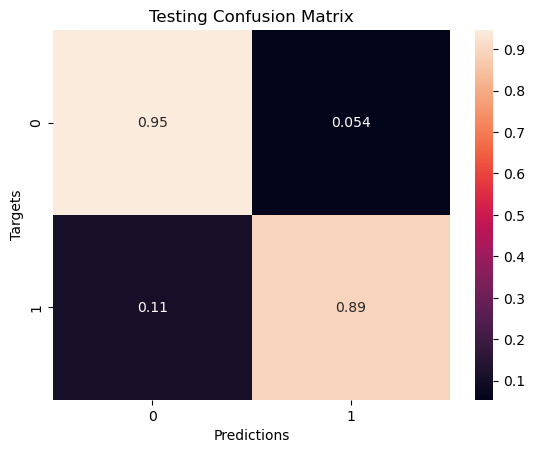

In [324]:
test_preds = predict_and_plot(test_inputs,test_targets, name = 'Testing')

In [325]:
def random_guess(inputs):
    return np.random.choice([0,1], len(inputs))

In [326]:
def all_no(inputs):
    return np.full(len(inputs), 0)

In [327]:
def all_yes(inputs):
    return np.full(len(inputs), 1)

In [328]:
accuracy_score(train_targets, random_guess(train_inputs))

0.45267489711934156

In [329]:
accuracy_score(test_targets, all_no(test_inputs))

0.5692307692307692

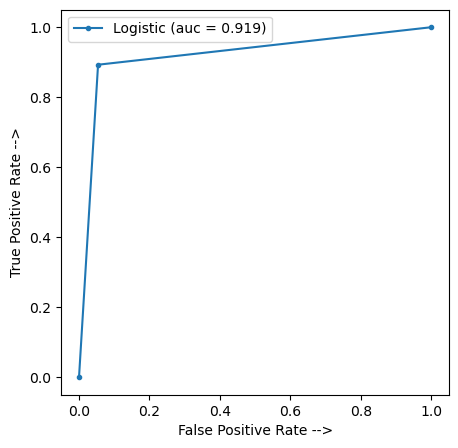

In [330]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(test_targets, test_preds)
auc_logistic = auc(logistic_fpr, logistic_tpr)

#svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
#auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
#plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

## Decision Tree Classifier

In [331]:
from sklearn.tree import DecisionTreeClassifier

In [332]:
dtmodel = DecisionTreeClassifier(random_state = 45)

In [333]:
%%time
dtmodel.fit(train_inputs,train_targets)

Wall time: 2 ms


DecisionTreeClassifier(random_state=45)

### Evaluation

In [334]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [335]:
train_preds = dtmodel.predict(train_inputs)

In [336]:
train_preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1], dtype=int64)

In [337]:
test_preds1 = dtmodel.predict(test_inputs)

In [338]:
accuracy_score(train_targets,train_preds)

1.0

In [339]:
train_probs = dtmodel.predict_proba(train_inputs)

In [340]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [341]:
val_preds = dtmodel.predict(val_inputs)

In [342]:
accuracy_score(val_targets,val_preds)

0.9135802469135802

In [343]:
test_preds = dtmodel.predict(test_inputs)

In [344]:
accuracy_score(test_targets,test_preds)

0.9076923076923077

In [345]:
def predict_and_plot(inputs,targets, name = ''):
    preds = dtmodel.predict(inputs)
    
    accuracy = accuracy_score(targets,preds)
    
    print("Accuracy Score: ", accuracy*100)
    
    cf = confusion_matrix(targets,preds, normalize = 'true' )
    plt.figure
    sns.heatmap(cf, annot = True)
    plt.xlabel('Predictions')
    plt.ylabel('Targets')
    plt.title('{} Confusion Matrix' .format(name))
    
    return preds

Accuracy Score:  100.0


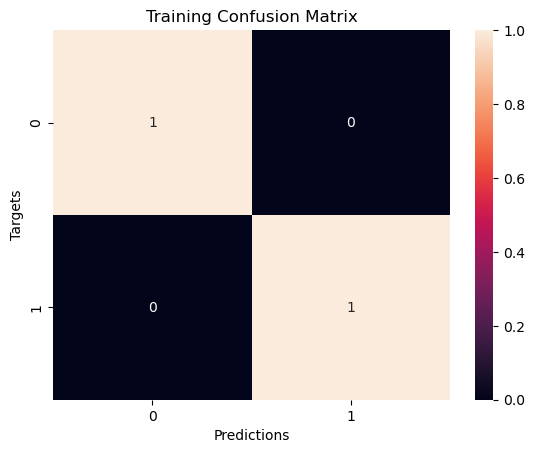

In [346]:
predict_and_plot(train_inputs,train_targets, name = 'Training');

Accuracy Score:  91.35802469135803


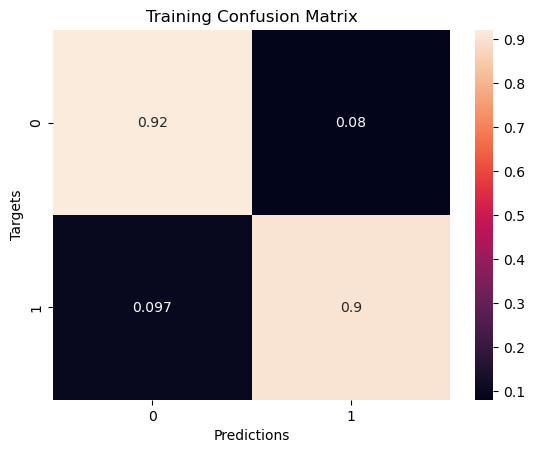

In [347]:
predict_and_plot(val_inputs,val_targets, name = 'Validation');

Accuracy Score:  90.76923076923077


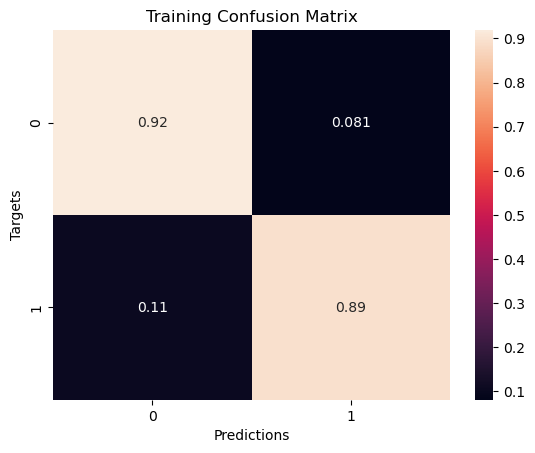

In [348]:
predict_and_plot(test_inputs,test_targets, name = 'Testing');

In [349]:
dtmodel.score(train_inputs,train_targets)

1.0

In [350]:
dtmodel.score(val_inputs,val_targets)

0.9135802469135802

In [351]:
dtmodel.score(test_inputs,test_targets)

0.9076923076923077

In [352]:
raw_df['flow_condition'].value_counts()/len(raw_df)

0    0.589506
1    0.410494
Name: flow_condition, dtype: float64

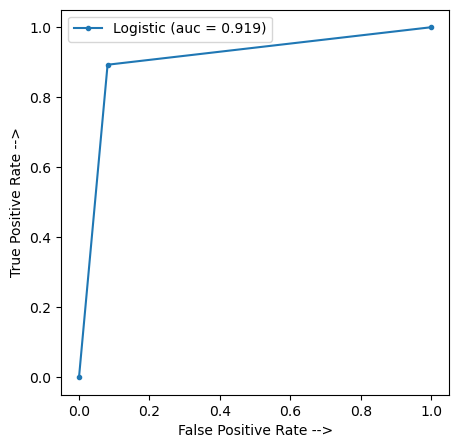

In [354]:
from sklearn.metrics import roc_curve, auc

dt_fpr, dt_tpr, threshold = roc_curve(test_targets,test_preds1)
auc_dt = auc(dt_fpr, dt_tpr)

#svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
#auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
#plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

## Visulaisation of Decision tree

In [355]:
from sklearn.tree import plot_tree, export_text

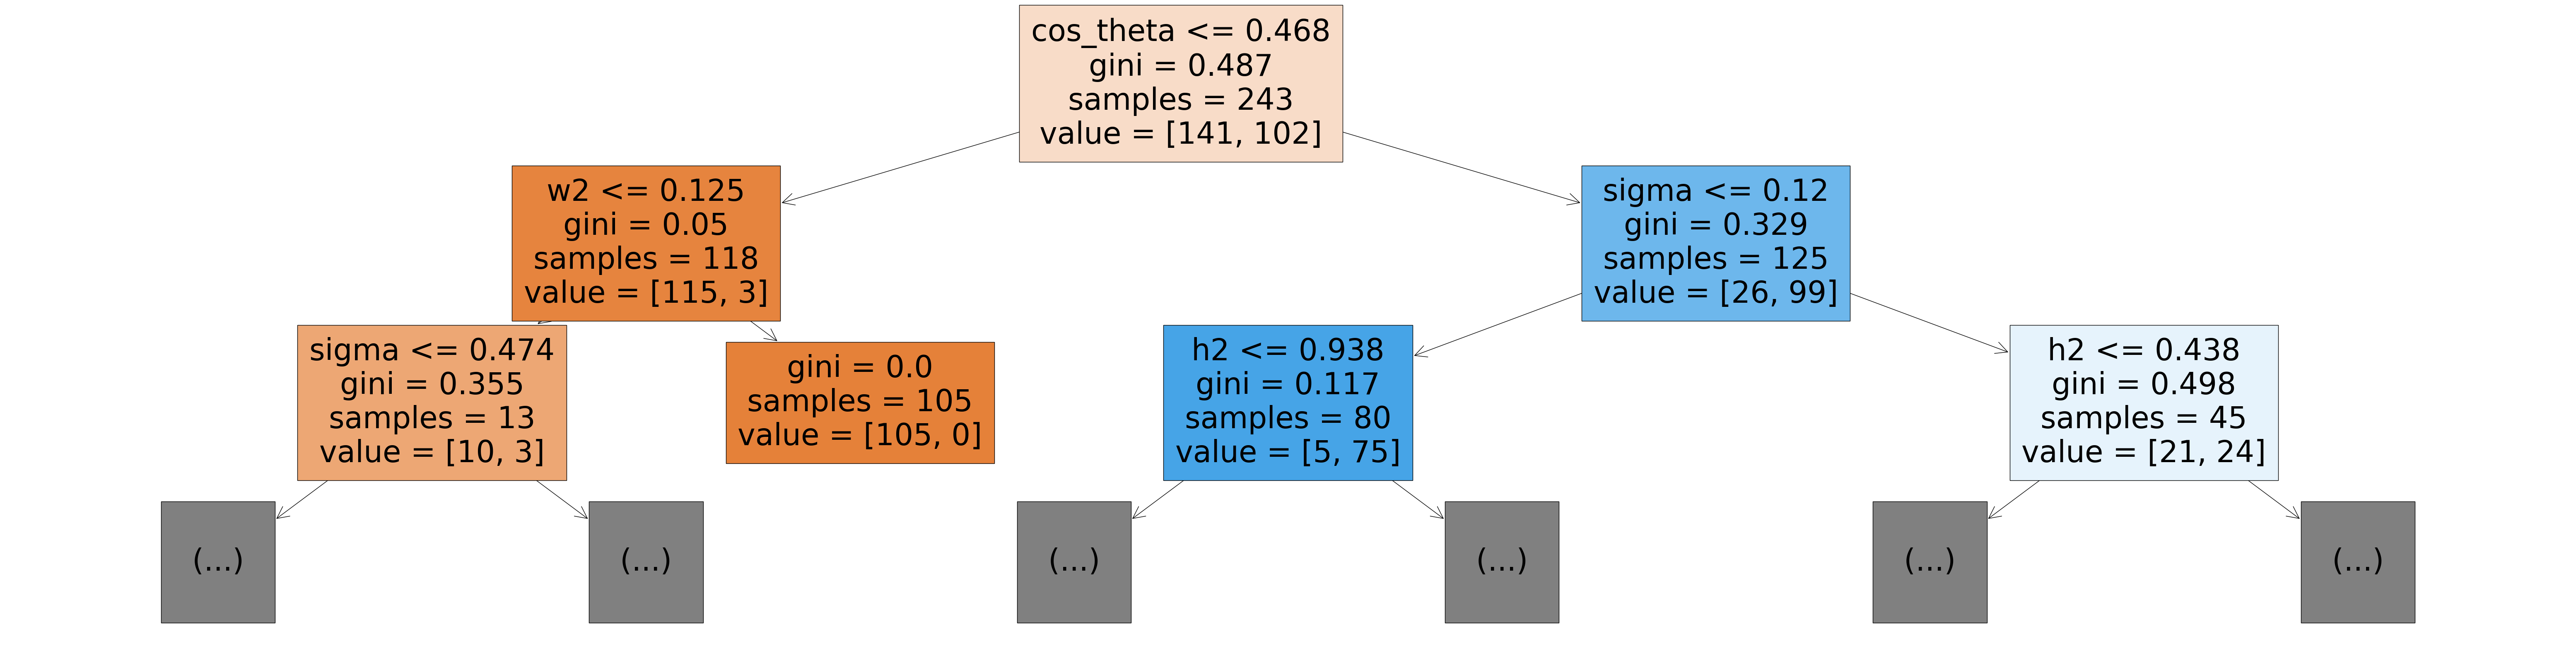

In [356]:
plt.figure(figsize = (80,20))
plot_tree(dtmodel, feature_names = train_inputs.columns, max_depth = 2, filled = True);

In [357]:
dtmodel.tree_.max_depth

11

In [358]:
dtmodel.feature_importances_

array([0.05082733, 0.        , 0.1133686 , 0.11943704, 0.61534751,
       0.10101952])

In [359]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': dtmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [360]:
importance_df

,feature,importance
4,cos_theta,0.615348
3,w2,0.119437
2,h2,0.113369
5,sigma,0.101020
0,h1,0.050827
1,w1,0.000000


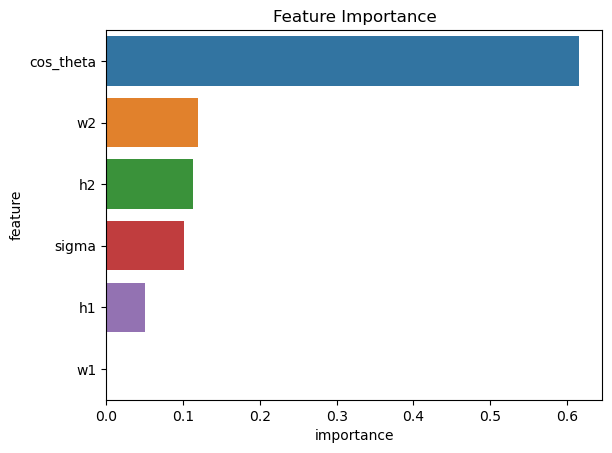

In [361]:
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

Hyperparameter Tuning and Overfitting

In [362]:
dtmodel = DecisionTreeClassifier(max_depth=7, random_state=43)

In [363]:
dtmodel.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=7, random_state=43)

In [364]:
dtmodel.score(train_inputs, train_targets)

0.9711934156378601

In [365]:
dtmodel.score(val_inputs, val_targets)

0.9259259259259259

In [366]:
dtmodel.score(test_inputs, test_targets)

0.9230769230769231

In [ ]:
print(export_text(dtmodel, feature_names=list(train_inputs.columns)))

|--- cos_theta <= 0.47
|   |--- w2 <= 0.12
|   |   |--- sigma <= 0.47
|   |   |   |--- h2 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- h2 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- sigma >  0.47
|   |   |   |--- class: 0
|   |--- w2 >  0.12
|   |   |--- class: 0
|--- cos_theta >  0.47
|   |--- cos_theta <= 0.69
|   |   |--- h2 <= 0.44
|   |   |   |--- w2 <= 0.62
|   |   |   |   |--- h2 <= 0.31
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- h2 >  0.31
|   |   |   |   |   |--- h1 <= 0.36
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- h1 >  0.36
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- w2 >  0.62
|   |   |   |   |--- h1 <= 0.36
|   |   |   |   |   |--- h2 <= 0.31
|   |   |   |   |   |   |--- h1 <= 0.21
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- h1 >  0.21
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- h2 >  0.31
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- h1 >  0.36
|   |

In [ ]:
def max_depth_error(md):
    dtmodel = DecisionTreeClassifier(max_depth=md, random_state=43)
    dtmodel.fit(train_inputs, train_targets)
    train_acc = 1 - model.score(train_inputs, train_targets)
    val_acc = 1 - model.score(val_inputs, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,9)])
errors_df

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,8))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

Here from the graph we can see that there is not much difference in the accuracy when there is a change in the max_depth of the model

## Training a Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfmodel = RandomForestClassifier(n_jobs = -1, random_state = 45)

In [ ]:
%%time
rfmodel.fit(train_inputs, train_targets)

In [ ]:
rfmodel.score(train_inputs, train_targets)

In [ ]:
rfmodel.score(val_inputs, val_targets)

In [ ]:
rfmodel

In [ ]:
rfmodel.score(test_inputs, test_targets)

In [ ]:
train_probs = rfmodel.predict_proba(train_inputs)
train_probs

In [ ]:
rfmodel.estimators_[0]

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(rfmodel.estimators_[0], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True, class_names=rfmodel.classes_);

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(rfmodel.estimators_[20], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True, class_names=rfmodel.classes_);

In [ ]:
len(rfmodel.estimators_)

In [ ]:
importance_df = pd.DataFrame({
                'feature'  : train_inputs.columns,
                'importance' : rfmodel.feature_importances_
}).sort_values('importance', ascending = False)

In [ ]:
importance_df

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Training Using XGBoost

In [ ]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --user

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgmodel = XGBClassifier(random_state=50, n_jobs=-1, n_estimators=10, max_depth=9)

In [ ]:
train_targets = pd.DataFrame(train_targets).replace({'Yes': 1, 'No' : 0}).copy()

In [ ]:
val_targets = pd.DataFrame(val_targets).replace({'Yes': 1, 'No' : 0}).copy()


In [ ]:
test_targets = pd.DataFrame(test_targets).replace({'Yes': 1, 'No' : 0}).copy()
test_targets

In [ ]:
%%time
xgmodel.fit(train_inputs, train_targets)

In [ ]:
train_preds = xgmodel.predict(train_inputs)
train_preds

In [ ]:
xgmodel.score(train_inputs,train_targets)

In [ ]:
xgmodel.score(val_inputs,val_targets)

In [ ]:
xgmodel.score(test_inputs,test_targets)

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': xgmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head()

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def train_and_evaluate(train_inputs, train_targets, val_inputs, val_targets, **params):
    model = XGBRegressor(random_state=45, n_jobs=-1, **params)
    model.fit(train_inputs, train_targets)
    train_accuracy = model.score(train_inputs,train_targets)
    val_accuracy = model.score(val_inputs,val_targets)
    return model, train_accuracy, train_accuracy

In [ ]:
kfold = KFold(n_splits=5)